# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

#### Importar a Base de dados

In [9]:
import pandas as pd

df = pd.read_csv("advertising.csv")


#print (df.info())
print (df)


        TV  Radio  Jornal  Vendas
0    230.1   37.8    69.2    22.1
1     44.5   39.3    45.1    10.4
2     17.2   45.9    69.3    12.0
3    151.5   41.3    58.5    16.5
4    180.8   10.8    58.4    17.9
..     ...    ...     ...     ...
195   38.2    3.7    13.8     7.6
196   94.2    4.9     8.1    14.0
197  177.0    9.3     6.4    14.8
198  283.6   42.0    66.2    25.5
199  232.1    8.6     8.7    18.4

[200 rows x 4 columns]


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

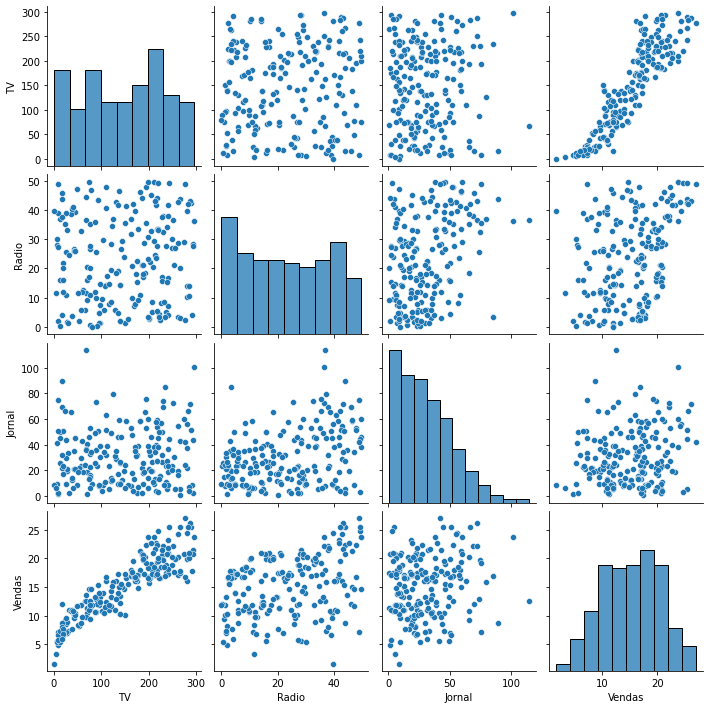

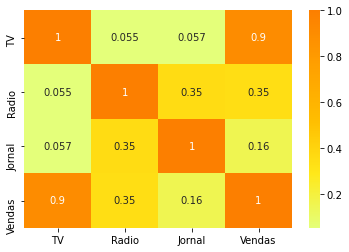

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt 

sns.pairplot(df)

plt.show()

sns.heatmap(df.corr() , cmap = 'Wistia' , annot = True)
plt.show()




#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [22]:
from sklearn.model_selection import train_test_split

x = df.drop('Vendas' , axis =1)

y = df['Vendas']

x_train , x_test , y_train , y_test = train_test_split( x, y, test_size = 0.3, random_state=1)





116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
       ... 
133    19.6
137    20.8
72      8.8
140    10.9
37     14.7
Name: Vendas, Length: 140, dtype: float64


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [41]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

import numpy as np


# Artificial Inteligence training

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

rf_reg =RandomForestRegressor()
rf_reg.fit(x_train, y_train)

#Artificial inteligence testing

test_pred_lin = lin_reg.predict(x_test)

test_pred_rf= rf_reg.predict(x_test)


r2_lin = metrics.r2_score(y_test, test_pred_lin)

rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))

print (f"R2 da Regressão Linear: {r2_lin}")

print (f"RSME da Regressão Linear: {rmse_lin}")


r2_rf = metrics.r2_score(y_test, test_pred_rf)

rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))

print (f"R2 do Random Forest: {r2_rf}")

print (f"RMSE do Random forest: {rmse_rf}")




R2 da Regressão Linear: 0.9071151423684273
RSME da Regressão Linear: 1.5396947656031235
R2 do Random Forest: 0.9612935199829692
RMSE do Random forest: 0.9939259110550797


#### Visualização Gráfica das Previsões

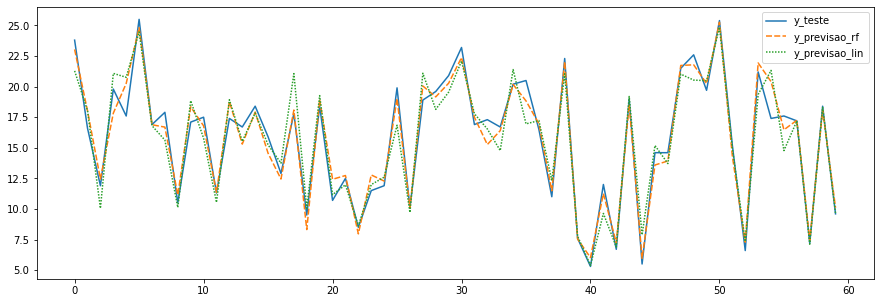

,y_teste,y_previsao_rf,y_previsao_lin
0,23.8,23.042,21.288161
1,16.6,18.019,18.042132
2,11.9,12.449,10.059590
3,19.8,17.831,21.082241
4,17.6,20.263,20.764760
5,25.5,24.821,24.471874
6,16.9,16.884,16.806436
7,17.9,16.691,15.628857
8,10.5,11.138,10.124799
9,17.1,18.347,18.846019


In [49]:
df_resultado = pd.DataFrame()

# df_resultado.index = x_test

df_resultado['y_teste'] = y_test

df_resultado['y_previsao_rf'] = test_pred_rf

df_resultado['y_previsao_lin'] = test_pred_lin

df_resultado = df_resultado.reset_index(drop=True)

fig = plt.figure(figsize=(15,5))

sns.lineplot(data=df_resultado)


plt.show()

display(df_resultado)




#### Qual a importância de cada variável para as vendas?

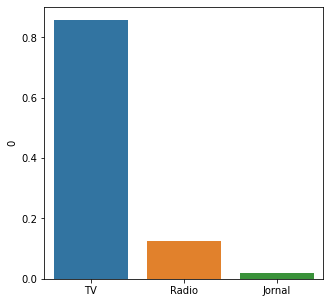

In [54]:
importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)

plt.figure(figsize=(5, 5 ))

sns.barplot(x=importancia_features.index, y=importancia_features[0])

plt.show()

